# Binomial logistic regression || Bank Churn Dataset

In this project, our primary objective is to build a binomial logistic regression model and evaluate the model's performance to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

he project employs a dataset titled 'bank-churn/train.csv' 

**Key dataset specifications:**
- 165,034 rows – signifying unique user entries
- 12 columns, capturing essential data variables

**About Dataset**
1. customer_id, unused variable.
2. credit_score, used as input.
3. country, used as input.
4. gender, used as input.
5. age, used as input.
6. tenure, used as input.
7. balance, used as input.
8. products_number, used as input.
9. credit_card, used as input.
10. active_member, used as input.
11. estimated_salary, used as input.
12. churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

To address the business' request, I will conduct a Binomial logistic regression, This will include:

- Exploring and cleaning data
- Using plots and descriptive statistics to select the independent variables
- Creating a fitting multiple linear regression model
- Checking model assumptions
- Interpreting model outputs and communicating the results to non-technical stakeholders

## Imports and data loading

Import the data and packages that are needed for building logistic regression models.

In [218]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-churn/train.csv
/kaggle/input/bank-churn/test.csv


In [219]:
df=pd.read_csv('/kaggle/input/bank-churn/train.csv')

## Exploratory data analysis (EDA):
Analyzing and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


We'll use .drop() to remove the id ,CustomesId ,Surname columns since we don't need this information for the analysis.

In [221]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df.columns = ['credit_score', 'country', 'gender','age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

In [222]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Now, we'll check the class balance of the dependent (target) variable, **churn**

In [223]:
prop = df['churn'].value_counts(normalize = True)
prop

churn
0    0.788401
1    0.211599
Name: proportion, dtype: float64

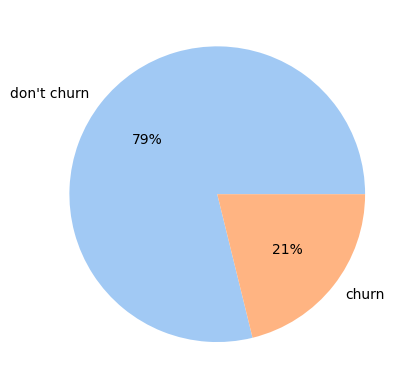

In [224]:
colors = sns.color_palette('pastel')[0:5]
#create pie chart
labels = ["don't churn", 'churn',]
plt.pie([prop[0],prop[1]], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

**Do we have any any variables that could potentially have outliers?** We can't get a good model with outliers

In [225]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


The following columns:

* credit_score
* age 
* balance

could have outliers. All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.

## Preparing variables
To check the data type of the label variable and to verify if there are any missing values we use info() function

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   credit_score      165034 non-null  int64  
 1   country           165034 non-null  object 
 2   gender            165034 non-null  object 
 3   age               165034 non-null  float64
 4   tenure            165034 non-null  int64  
 5   balance           165034 non-null  float64
 6   products_number   165034 non-null  int64  
 7   credit_card       165034 non-null  float64
 8   active_member     165034 non-null  float64
 9   estimated_salary  165034 non-null  float64
 10  churn             165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


We **don't** have missing values in any column

### Impute outliers
For this analysis, impute the outlying values for these columns. Calculate the 95th percentile of each column and change to this value any value in the column that exceeds it.

In [227]:
# Impute outliers
for column in ['credit_score', 'age', 'balance']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold
#Check the result
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,654.591139,37.838293,5.020353,54843.726553,1.554455,0.753954,0.497770,112574.822734,0.211599
std,76.366089,8.077647,2.806159,61714.913577,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,787.000000,56.000000,10.000000,151671.550000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Encode categorical variables

We'll change the data type of the  contry and gender columns to be binary. This change is needed to train a logistic regression model.

In [228]:
# Create binary `gender2` column
df['gender2'] = np.where(df['gender']=='Male', 1, 0)
df[['gender', 'gender2']].tail()

,gender,gender2
165029,Female,0
165030,Male,1
165031,Male,1
165032,Female,0
165033,Male,1


In [229]:
# Convert the categorical column country into numeric through one-hot encoding.
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [230]:
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(df[["country"]]).toarray()
print(feature_arry)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [231]:
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['France' 'Germany' 'Spain']


In [232]:
ohe_country = pd.DataFrame(feature_arry, columns = feature_labels)

In [233]:
df = pd.concat([df,ohe_country], axis = 1)
df[['country','France', 'Germany', 'Spain']].head(20)

,country,France,Germany,Spain
0,France,1.0,0.0,0.0
1,France,1.0,0.0,0.0
2,France,1.0,0.0,0.0
3,France,1.0,0.0,0.0
4,Spain,0.0,0.0,1.0
5,Germany,0.0,1.0,0.0
6,France,1.0,0.0,0.0
7,Spain,0.0,0.0,1.0
8,France,1.0,0.0,0.0
9,Germany,0.0,1.0,0.0


## Determine whether assumptions have been met 
The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the logit of y

For the first assumption, you can assume that observations are independent for this dataset.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

### Collinearity  

We'll check the correlation among predictor variables

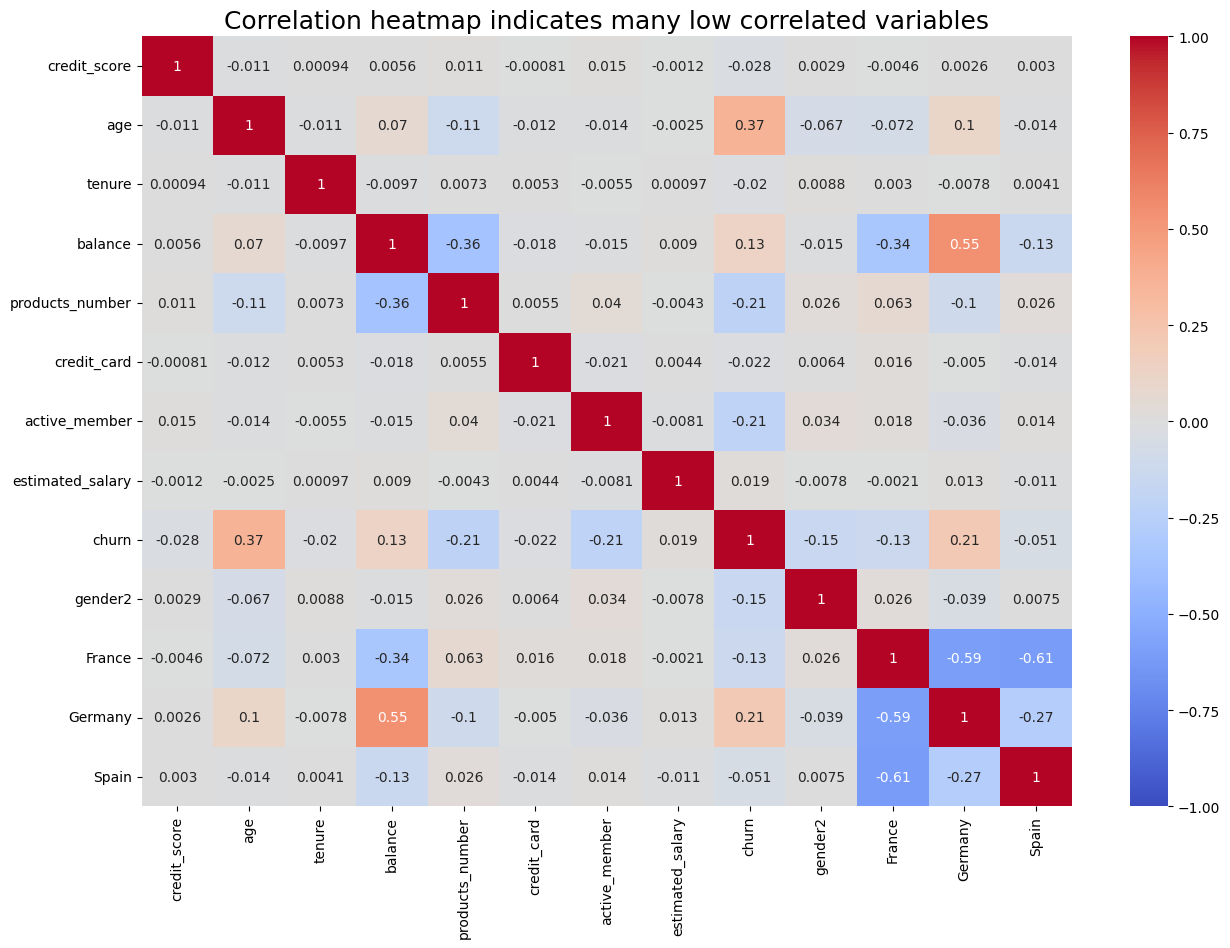

In [234]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in our model. We don't have multicollinear in the predictior variables

## Model building
### Assign predictor variables and target

To build our model I need to determine what X variables we want to include in our model to predict your **target—chunr** We'll drop the following variables and assign the results to X:
* churn this is the target
* country (this is the non-binary-encoded categorical variable)
* gender (this is the non-binary-encoded categorical variable)

In [235]:
# Isolate predictor variables
X = df.drop(columns = ['churn', 'country', 'gender'])
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender2,France,Germany,Spain
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,1.0,0.0,0.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,1.0,0.0,0.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,1.0,0.0,0.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,1.0,0.0,0.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,1,0.0,0.0,1.0


Now, we'll isolate the dependent (target) variable. Assign it to a variable called y.

In [236]:
# Isolate target variable
y = df['churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

### Split the data
We've to use scikit-learn's train_test_split() function to perform a train/test split on our data using the X and y variables you assigned above

**Note:** Because the target class is imbalanced (79% retained vs. 21% churned), I want to make sure that I don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's stratify parameter to y to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [237]:
#Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.tail()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender2,France,Germany,Spain
101720,636,24.0,1,104091.47,1,1.0,0.0,122996.76,1,1.0,0.0,0.0
29337,660,33.0,4,0.00,1,1.0,0.0,29664.45,0,0.0,0.0,1.0
107315,732,47.0,5,151671.55,1,0.0,0.0,97949.84,0,0.0,0.0,1.0
122768,662,33.0,5,127864.85,1,1.0,0.0,139946.68,1,1.0,0.0,0.0
75738,542,36.0,3,0.00,2,0.0,1.0,1843.24,1,1.0,0.0,0.0


### Fit a LogisticRegression model to the data
We'll use scikit-learn to instantiate a logistic regression model.

In [238]:
model = LogisticRegression(penalty='none', max_iter=400)
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

### Obtain parameter estimates
We have to call the .coef_ attribute on the model to get the coefficients of each variable. The coefficients are in order of how the variables are listed in the dataset. The coefficients represent the change in the log odds of the target variable for every one unit increase in X

In [239]:
beta_c = pd.Series(model.coef_[0], index=X.columns)
beta_c

credit_score       -0.006999
age                 0.081160
tenure             -0.002635
balance             0.000004
products_number    -0.003133
credit_card        -0.000383
active_member      -0.003266
estimated_salary   -0.000001
gender2            -0.002318
France             -0.001458
Germany             0.001767
Spain              -0.000499
dtype: float64

The model's intercept_ attribute to get the intercept of the model.

In [240]:
beta_i = pd.Series(model.intercept_)
beta_i

0   -0.000189
dtype: float64

### What do these coefficients mean and how can we interpret them?

To begin we must know the equation that describe how work our binomial logistic regression:

$
logit(odds) = ln(\frac{p}{1-p}) = \beta_{intercept} + \beta_{credit.score}*x_{credit.score} + \beta_{age}*x_{age} + \beta_{tenure}*x_{tenure} + \beta_{balance}*x_{balance} + \beta_{products.number}*x_{products.number} + \beta_{credit.card}*x_{credit.card} + \beta_{active.member}*x_{active.member} + \beta_{estimated.salary }*x_{estimated.salary } + \beta_{gender2}*x_{gender2} + \beta_{France}*x_{France} + \beta_{Germany }*x_{Germany } + \beta_{Spain }*x_{Spain} 
$

Where:



$
\beta_{intercept} = -0.0001894
$

$
\beta_{credit.score} = -0.006999
$

$
\beta_{age} = 0.081160
$

$
\beta_{tenure} = -0.002635
$

$
\beta_{balance} = 0.000004
$

$
\beta_{products.number} = -0.003133
$

$
\beta_{credit.card} = -0.000383
$

$
\beta_{active.member} = -0.003266
$

$
\beta_{estimated.salary} = -0.000001
$

$
\beta_{gender2} = -0.002318
$

$
\beta_{France} = -0.001458
$

$
\beta_{Germany} = 0.001767
$

$
\beta_{Spain} = -0.000499
$




If we keep all the parameters except, for example, $\beta_{age}$ by how many do we expect the probabilities to increase or decrease?

The relationship is through $e$

$e^{ln(odds)} =e^{(\beta_{age})} $

$odds =e^{\beta_{age}} = e^{0.081160}$

$odds =  1.084544409791$

**We expect that that by one unit increase in the age the odds of churn increase 8.45%** holding as founding the previous odds

let's calculate the value $ln(\frac{p}{1-p})$ for the first column of X_test data

In [241]:
logit1 = beta_i.iloc[0] + beta_c.iloc[0]*X_train.loc[79153,'credit_score'] + beta_c.iloc[1]*X_train.loc[79153,'age'] + beta_c.iloc[2]*X_train.loc[79153,'tenure'] + beta_c.iloc[3]*X_train.loc[79153,'balance'] + beta_c.iloc[4]*X_train.loc[79153,'products_number']  + beta_c.iloc[5]*X_train.loc[79153,'credit_card'] + beta_c.iloc[6]*X_train.loc[79153,'active_member'] + beta_c.iloc[7]*X_train.loc[79153,'estimated_salary'] + beta_c.iloc[8]*X_train.loc[79153,'gender2'] + beta_c.iloc[9]*X_train.loc[79153,'France'] + beta_c.iloc[10]*X_train.loc[79153,'Germany'] + beta_c.iloc[11]*X_train.loc[79153,'Spain']
logit1

-2.292019109694082

How can we calculate the odds of churn for this value of $ln(\frac{p}{1-p})$?

$ln(\frac{p}{1-p}) = -2.292$

If we solve the equation to obtain the value of p:

$p = \frac{e^{-2.292}}{1 + e^{-2.292}}$

The likelihood of churn to the firs row of data is:


In [242]:
import math
p1 = math.exp(logit1)/(1 + math.exp(logit1))
p1

0.09178609531606285

Now we know how calculate the odds and from the value come. Afterwards we going to check the final assumption and evaluate the model

### Check final assumption

To verify the linear relationship between X and the estimated log odds by making a regplot.

we have to call the model's predict_proba() method to generate the probability of response for each sample in the training data. Assign the result to a variable called training_probabilities. This results in a 2-D array where each row represents a user in X_train. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [243]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.9082139 , 0.0917861 ],
       [0.95812963, 0.04187037],
       [0.56123275, 0.43876725],
       ...,
       [0.69931188, 0.30068812],
       [0.83888431, 0.16111569],
       [0.71008248, 0.28991752]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where p is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. we'll create a dataframe called logit_data that is a copy of df.

2. We'll create a new column called logit in the logit_data dataframe. The data in this column should represent the logit for each user.

In [244]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

In [245]:
logit_data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender2,France,Germany,Spain,logit
79153,695,35.0,9,0.0,1,1.0,0.0,170893.85,0,1.0,0.0,0.0,-2.292019
28758,754,29.0,7,0.0,1,1.0,1.0,126732.56,1,1.0,0.0,0.0,-3.130405
140555,646,56.0,2,0.0,2,1.0,1.0,181224.56,0,0.0,0.0,1.0,-0.246167
154282,717,22.0,2,0.0,2,1.0,1.0,6078.46,1,0.0,0.0,1.0,-3.259600
60192,712,50.0,8,0.0,2,1.0,0.0,180622.01,0,1.0,0.0,0.0,-1.207728


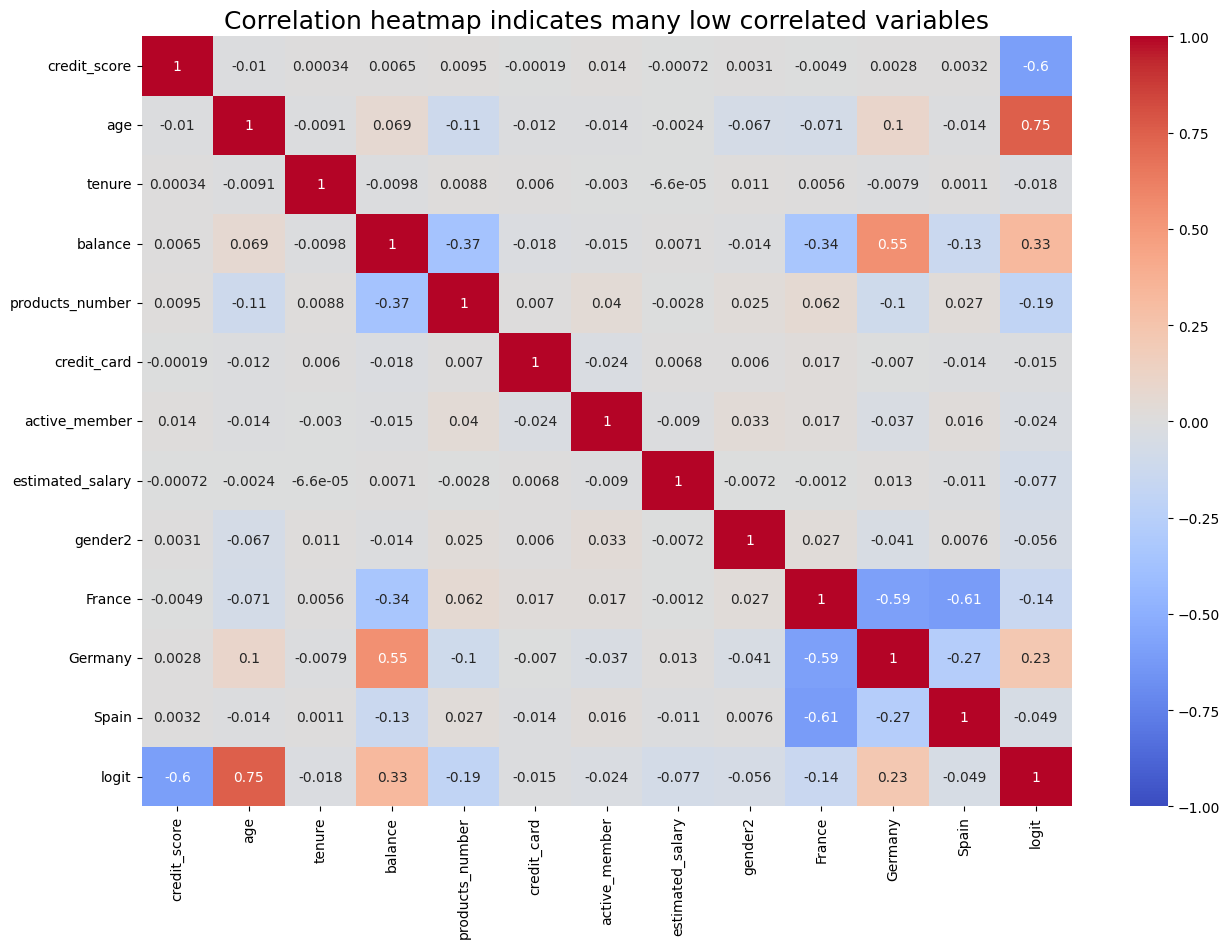

In [246]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(logit_data.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

## Results and evaluation

In [247]:
# Generate predictions on X_test

y_preds = model.predict(X_test)

Now, we have to use the score() method on the model with X_test and y_test as its two arguments.

In [248]:
# Score the model (accuracy(default)) on the test data
model.score(X_test, y_test)

0.7899609782108146

### Show results with a confusion matrix

A confusion matrix is a table used to evaluate the performance of a machine learning algorithm. It shows how many samples were correctly or incorrectly classified by the algorithm in each class.

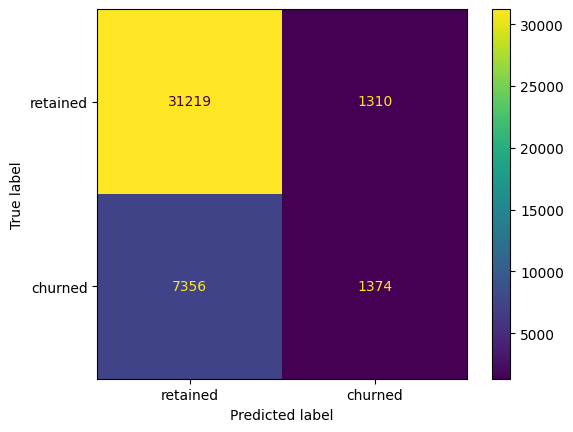

In [249]:
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

We can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's classification_report() function to generate a table from y_test and y_preds.

In [250]:
# Calculate precision manually
precision_m = cm[1,1] / (cm[0, 1] + cm[1, 1])
print(precision_m)
# Calculate precision with sklearn.metrics
import sklearn.metrics as metrics
precision_f = metrics.precision_score(y_test,y_preds)
print(precision_f)

0.5119225037257824
0.5119225037257824


In [251]:
# Calculate recall manually
recall_m = cm[1,1] / (cm[1, 0] + cm[1, 1])
print(recall_m)
# Calculate precision with sklearn.metrics
recall_f = metrics.recall_score(y_test,y_preds)
print(recall_f)

0.15738831615120275
0.15738831615120275


In [252]:
# Calculate Accuracy manually
accuracy_m = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print(accuracy_m)
accuracy_f = metrics.accuracy_score(y_test,y_preds)
print(accuracy_f)

0.7899609782108146
0.7899609782108146


In [253]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.81      0.96      0.88     32529
     churned       0.51      0.16      0.24      8730

    accuracy                           0.79     41259
   macro avg       0.66      0.56      0.56     41259
weighted avg       0.75      0.79      0.74     41259



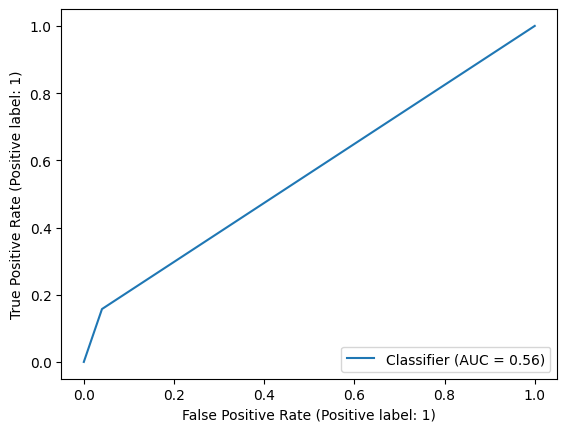

In [254]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_preds)
plt.show()

In [255]:
metrics.roc_auc_score(y_test,y_preds)

0.558558279321259

## Conclusion
1. 'age' was by far the most important feature in the model. It had a positive correlation with user churn **(+0.75)**, User churn rate increased as the values in 'age' increase,This is called a positive linear relationship. The bank should focus on the older user
2. User churn rate decrease as the values in 'credit_score' increase. it's a powerfull insight, maybe the bank must focus in user with poor 'credit_score'
3. In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.

## Bonus c:

Let's try to improve the performance of our model, let's check the variables that are relevant in our model. After that, we will build a model with just these variables and check the performance. All to reduce overfitting in the model.

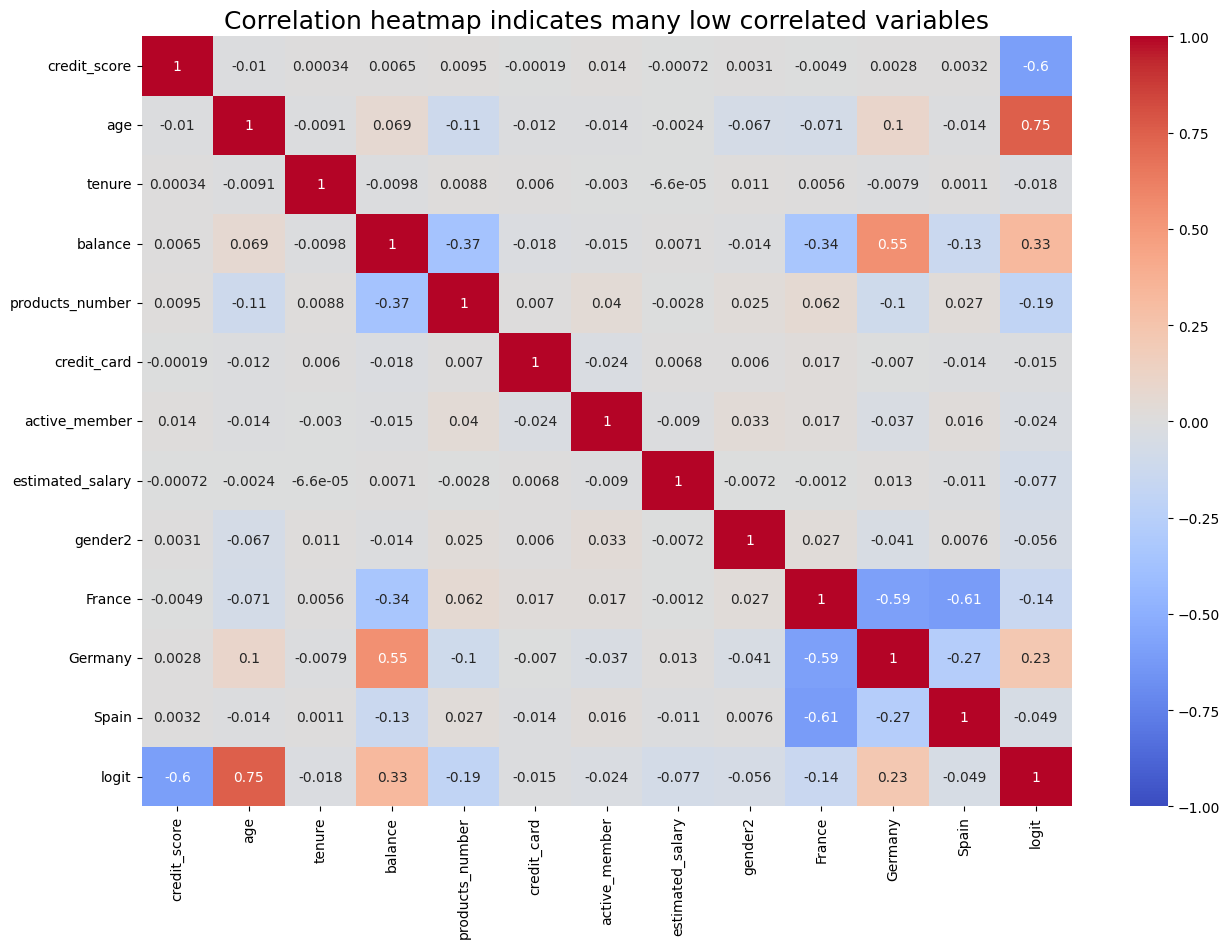

In [256]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(logit_data.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

We can observe in the heatmap above that only the next variables have a clear relationship with the logit of the odds:

- credit_score
- age
- balance
- products_number
- France
- Germany 

We will make a model with these variables como predictors

In [257]:
# Isolate predictor variables
X = df[['credit_score', 'age', 'balance']]
X.head()

,credit_score,age,balance
0,668,33.0,0.00
1,627,33.0,0.00
2,678,40.0,0.00
3,581,34.0,148882.54
4,716,33.0,0.00


In [258]:
# Isolate target variable
y = df['churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [259]:
#Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.tail()

,credit_score,age,balance
101720,636,24.0,104091.47
29337,660,33.0,0.00
107315,732,47.0,151671.55
122768,662,33.0,127864.85
75738,542,36.0,0.00


In [260]:
model = LogisticRegression(penalty='none', max_iter=1000)
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='none')

In [261]:
pd.Series(model.coef_[0], index=X.columns)

credit_score   -0.007173
age             0.079539
balance         0.000004
dtype: float64

In [262]:
pd.Series(model.intercept_)

0   -0.00018
dtype: float64

I will change the threshold to improve the model performance

In [263]:
# Generate predictions on X_test
probs = model.predict_proba(X_test)
custom_threshold = 0.25
y_preds =  (probs[:, 1] >= custom_threshold).astype(int)


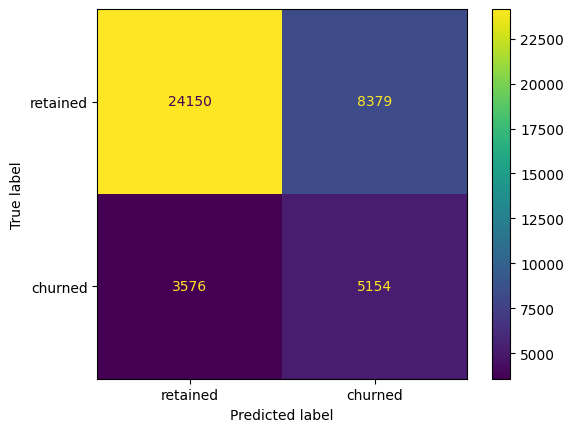

In [264]:
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [265]:
precision_f = metrics.precision_score(y_test,y_preds)
print(precision_f)
recall_f = metrics.recall_score(y_test,y_preds)
print(recall_f)
accuracy_f = metrics.accuracy_score(y_test,y_preds)
print(accuracy_f)

0.3808468188871647
0.5903780068728522
0.7102450374463753


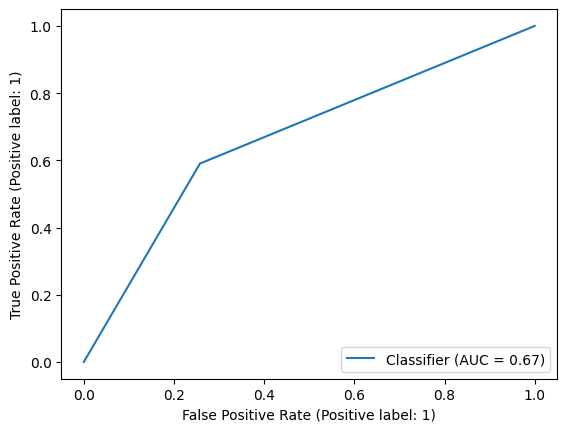

In [266]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_preds)
plt.show()